In [53]:
from app import get_similar_songs, lazy_track_search, get_feature_vector
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [5]:
searched_song = 'humble'

In [7]:
user_track_id = lazy_track_search(searched_song)
print(user_track_id)

7KXjTSCq5nL1LoYtL7XAwS


In [9]:
filename = "models/app_data/Spotify_model_new"
knn_model = pickle.load(open(filename, 'rb'))

In [10]:
recommendations = get_similar_songs(knn_model, user_track_id)
print(recommendations)

[(1, 'Chupable by El Alfa'), (2, 'Pandora by DJ Matt D'), (3, 'Fashion Killer by Ayra Starr'), (4, 'Como Lo Hice Yo by Matisse'), (5, 'Settle Me Down by Josh Abbott Band')]


In [11]:
features_names, user_track_features = get_feature_vector(user_track_id)
print(features_names)
print(user_track_features)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
[0.908, 0.621, 1, -6.638, 0, 0.102, 0.000282, 5.39e-05, 0.0958, 0.421, 150.011, 177000, 4]


In [35]:
ten_features_names = features_names[:-3]
ten_user_track_features = user_track_features[:-3]
ten_features_names[3] = 'relative loudness'
ten_user_track_features[3] = np.log(-ten_user_track_features[3])
print(ten_features_names)
print(ten_user_track_features)

['danceability', 'energy', 'key', 'relative loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
[0.908, 0.621, 1, 1.892810713297783, 0, 0.102, 0.000282, 5.39e-05, 0.0958, 0.421]


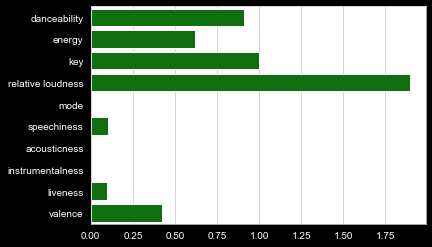

In [54]:
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                'figure.facecolor':'black'}
sns.set_style("whitegrid", rc=custom_style)
# fig = plt.figure(figsize=(6,6))
fig = Figure()
ax = sns.barplot(x=ten_user_track_features, y=ten_features_names, 
                #  palette="Greens",
                color='green',
                 orient="h")
plt.show()

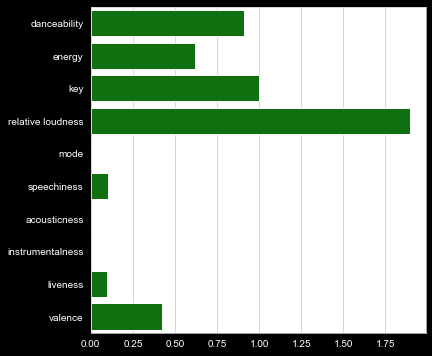

In [51]:
# Full script

# Get first 10 features (the final 3 skew the graph dimensions)
ten_features_names = features_names[:-3]
ten_user_track_features = user_track_features[:-3]

# Take the log of loudness to help with scale
ten_features_names[3] = 'relative loudness'
ten_user_track_features[3] = np.log(-ten_user_track_features[3])

# Plot the figure
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                'figure.facecolor':'black'}
sns.set_style("whitegrid", rc=custom_style)
fig = plt.figure(figsize=(6,6))
ax = sns.barplot(x=ten_user_track_features, y=ten_features_names, 
                #  palette="Greens",
                color='green',
                 orient="h")
plt.show()